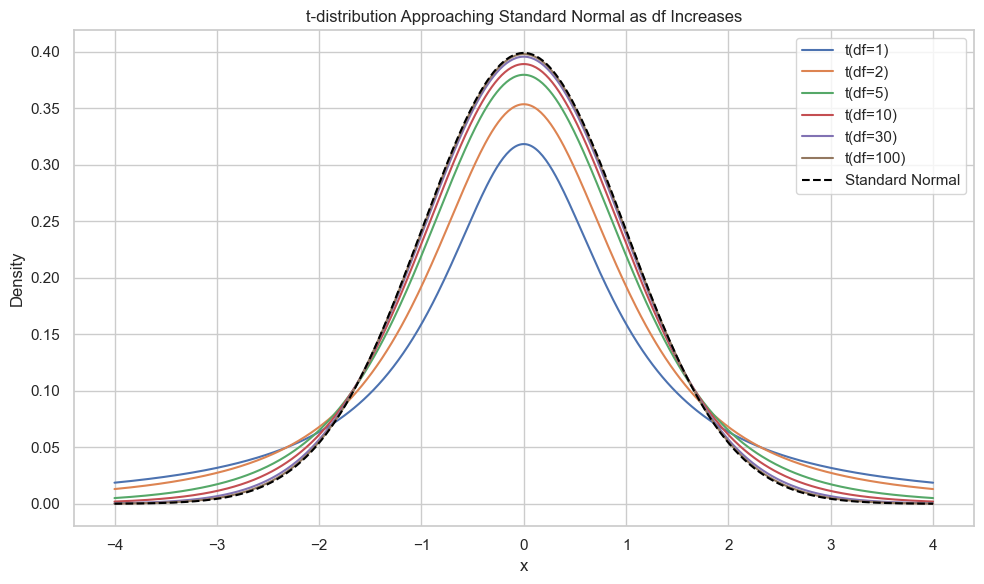

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm

# 스타일 설정
sns.set(style="whitegrid")

# x 범위 설정
x = np.linspace(-4, 4, 500)

# 자유도 목록
dfs = [1, 2, 5, 10, 30, 100]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# t-분포들 그리기
for df in dfs:
    sns.lineplot(x=x, y=t.pdf(x, df), label=f't(df={df})')

# 표준 정규분포 추가
sns.lineplot(x=x, y=norm.pdf(x), label='Standard Normal', linestyle='--', color='black')

# 제목 및 축 설정
plt.title("t-distribution Approaching Standard Normal as df Increases")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

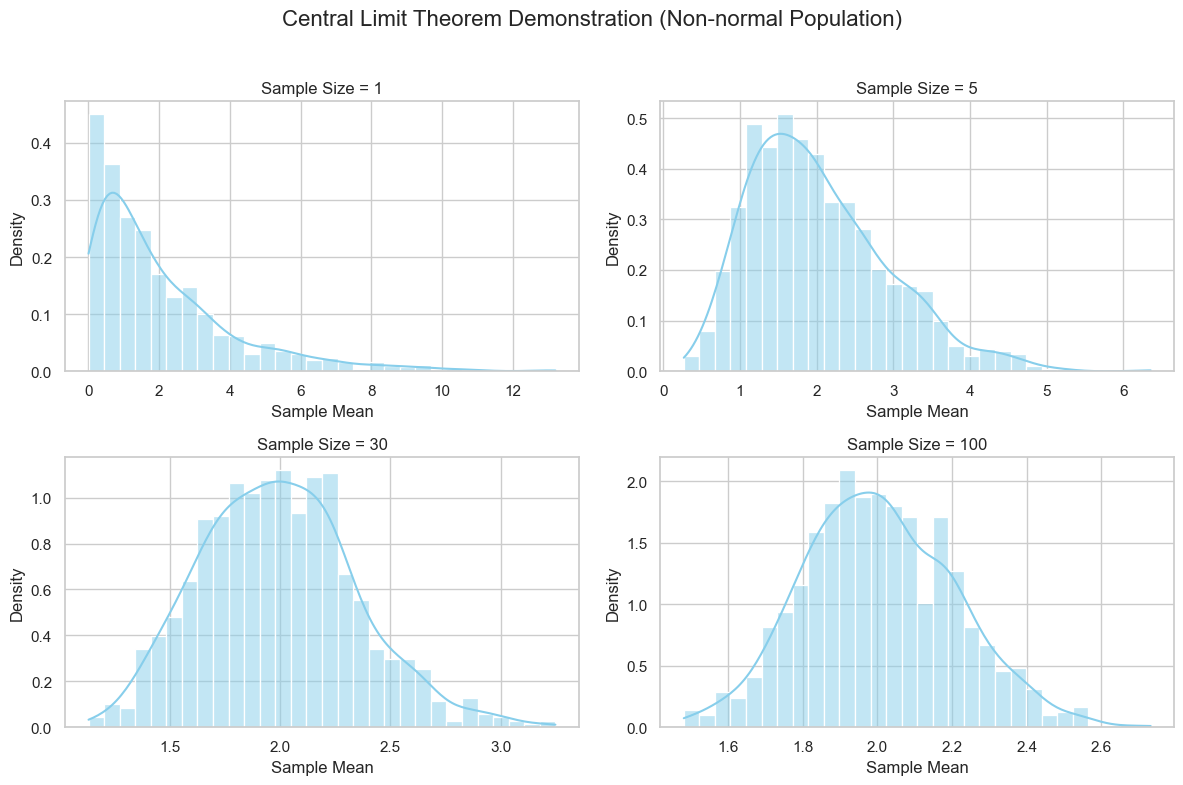

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
sns.set(style="whitegrid")

# 모집단 설정 (정규분포가 아닌 지수분포)
population = np.random.exponential(scale=2, size=100000)

# 시뮬레이션 파라미터
sample_sizes = [1, 5, 30, 100]  # 표본 크기
num_samples = 1000              # 표본 평균 추출 횟수

# 서브플롯 설정
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# 반복: 서로 다른 표본 크기에 대해
for idx, n in enumerate(sample_sizes):
    sample_means = []

    # 각 표본 크기마다 표본 평균을 여러 번 계산
    for _ in range(num_samples):
        sample = np.random.choice(population, size=n, replace=False)
        sample_means.append(np.mean(sample))

    # 히스토그램 시각화
    sns.histplot(sample_means, kde=True, stat="density", bins=30, ax=axes[idx], color="skyblue")
    axes[idx].set_title(f"Sample Size = {n}")
    axes[idx].set_xlabel("Sample Mean")
    axes[idx].set_ylabel("Density")

plt.suptitle("Central Limit Theorem Demonstration (Non-normal Population)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


검정통계량(Chi2): 14.71617866666675, pvalue: 0.012896215027320648


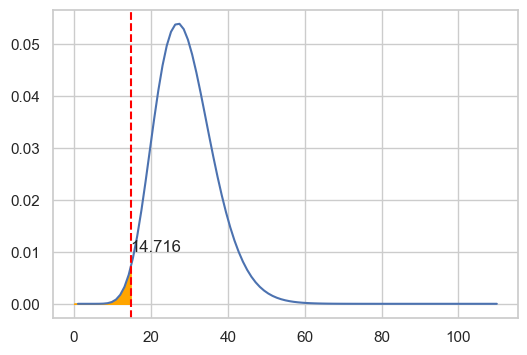

In [5]:
from scipy.stats import chi2
X = [
    99.674, 100.299, 100.085, 99.548, 99.826, 100.495, 99.272, 99.871, 100.380, 99.740, 
    99.796, 99.972, 100.447, 99.808, 99.867, 99.870, 100.662, 100.656, 100.301, 100.116, 
    100.221, 100.447, 99.719, 100.353, 99.624, 99.809, 100.272, 99.571, 99.958, 99.741
]
S_sq = np.var(X, ddof=1)
n = len(X)
Chi2 = (n - 1) * S_sq / (0.5 ** 2)
print("검정통계량(Chi2): {}, pvalue: {}".format(Chi2, chi2.cdf(Chi2, df= n -1)))

plt.figure(figsize=(6, 4))
plt.plot(np.linspace(1, 110, 100), chi2.pdf(np.linspace(1, 110, 100), df=n-1))
plt.axvline(Chi2, color='red', linestyle='--')
plt.text(Chi2, 0.01, str(Chi2)[:6])

plt.fill_between(np.linspace(0, Chi2, 100), np.zeros(shape=100),
                chi2.pdf(np.linspace(0, Chi2, 100), df=n-1), color='orange')
plt.show()

In [14]:
import numpy as np
a = [57, 61, 63, 60, 59]
np.mean(a), np.var(a)

(60.0, 4.0)

In [13]:
from scipy.stats import t
t.ppf(0.975, 4), t.ppf(0.975, 5)

(2.7764451051977987, 2.5705818366147395)

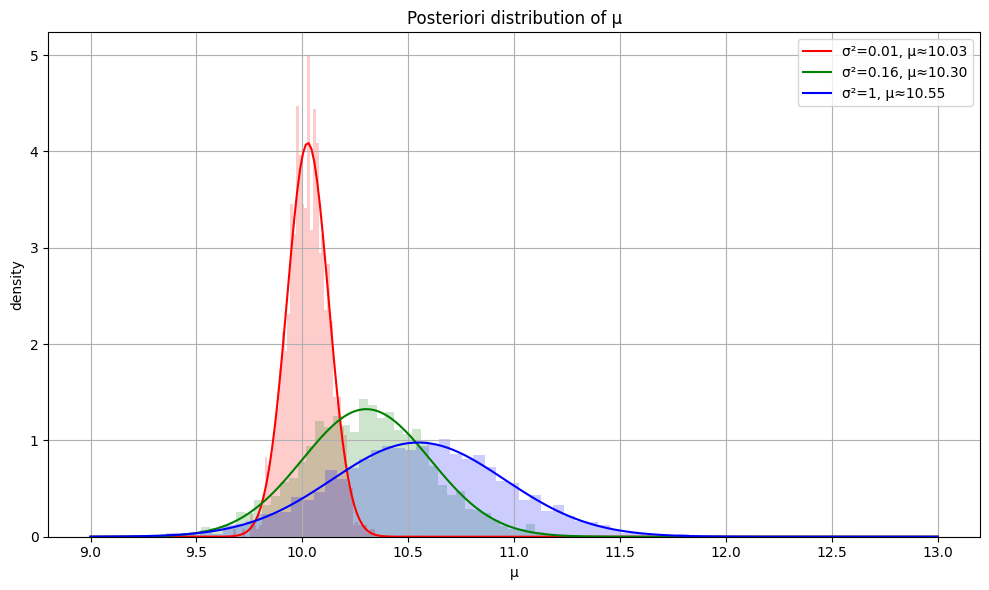

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 1. 샘플 데이터 생성
np.random.seed(42)
true_mu = 11
sigma_x = 2
n = 20
X = np.random.normal(loc=true_mu, scale=sigma_x, size=n)

# 2. 우도 함수 정의
def log_likelihood(mu):
    return np.sum(norm.logpdf(X, loc=mu, scale=sigma_x))

# 3. M-H 알고리즘
def metropolis_hastings(init_mu, iterations, proposal_std, log_prior_func, burn_in=1000, thinning=10):
    mu = init_mu
    samples = []

    for _ in range(iterations):
        mu_candidate = np.random.normal(mu, proposal_std)
        log_like_cand = log_likelihood(mu_candidate)
        log_like_curr = log_likelihood(mu)
        log_prior_cand = log_prior_func(mu_candidate)
        log_prior_curr = log_prior_func(mu)
        log_alpha = (log_like_cand + log_prior_cand) - (log_like_curr + log_prior_curr)
        alpha = np.exp(log_alpha)

        if np.random.rand() < min(1, alpha):
            mu = mu_candidate
        samples.append(mu)

    return np.array(samples[burn_in::thinning])

# 4. 다양한 사전 분산에 대해 실행 및 시각화
sigma_mu_values = [0.01, 0.16, 1]
colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))

for sigma_mu2, color in zip(sigma_mu_values, colors):
    # log prior 정의
    log_prior = lambda mu: norm.logpdf(mu, loc=10, scale=np.sqrt(sigma_mu2))

    # M-H 샘플링
    samples = metropolis_hastings(
        init_mu=10, iterations=20000, proposal_std=0.3, log_prior_func=log_prior
    )

    # 샘플 평균 및 표준편차
    mean_est = np.mean(samples)
    std_est = np.std(samples)

    # 시각화
    x_vals = np.linspace(9, 13, 300)
    y_vals = norm.pdf(x_vals, loc=mean_est, scale=std_est)
    plt.plot(x_vals, y_vals, label=f'σ²={sigma_mu2}, μ≈{mean_est:.2f}', color=color)
    plt.hist(samples, bins=50, density=True, alpha=0.2, color=color)

plt.title("Posteriori distribution of μ")
plt.xlabel("μ")
plt.ylabel("density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

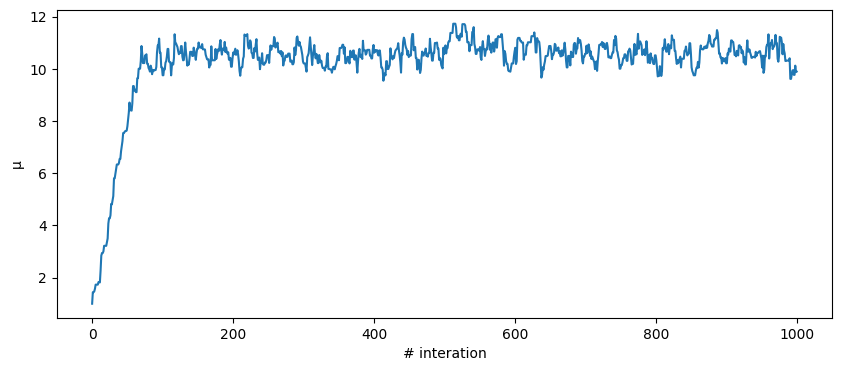

In [31]:
import seaborn as sns
plt.figure(figsize = (10, 4))
samples = metropolis_hastings(
    init_mu=1, iterations=1000, proposal_std=0.3, log_prior_func=log_prior, burn_in = 0, thinning = 1
)    
sns.lineplot(
    # M-H 샘플링
    samples
)
plt.ylabel("μ")
plt.xlabel("# interation")
plt.show()

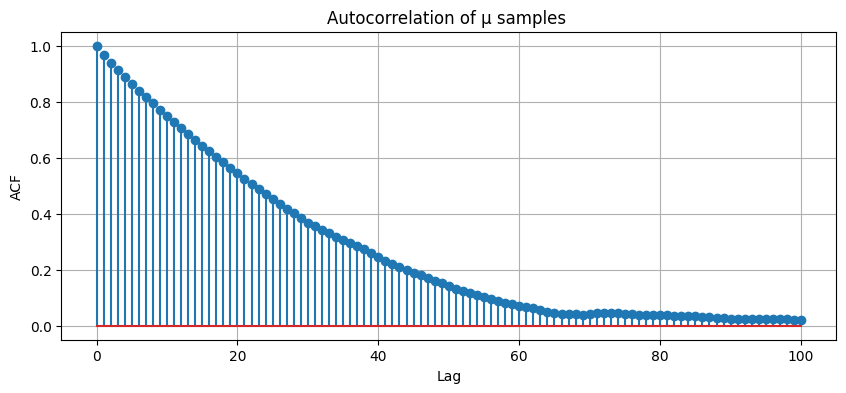

In [36]:
from statsmodels.tsa.stattools import acf
plt.figure(figsize = (10, 4))
# mh_samples: MCMC 결과 샘플 (예: Metropolis-Hastings 결과)
acf_values = acf(samples, nlags=100, fft=True)

plt.stem(range(len(acf_values)), acf_values, use_line_collection=True)
plt.title("Autocorrelation of μ samples ")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

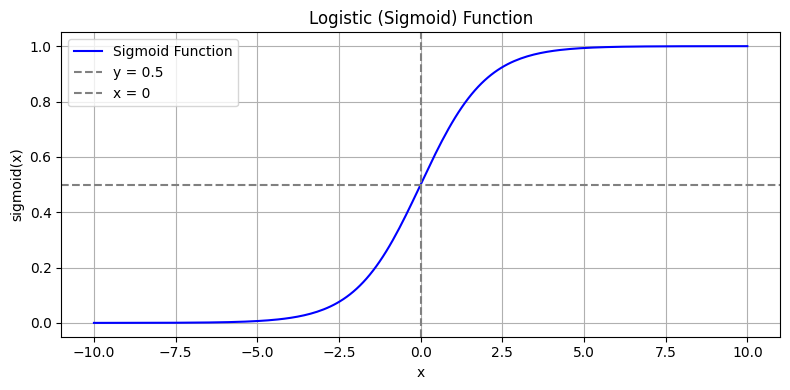

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 로지스틱 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 입력 값 범위
x = np.linspace(-10, 10, 200)
y = sigmoid(x)

# 시각화
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sigmoid Function', color='blue')
plt.axhline(0.5, color='gray', linestyle='--', label='y = 0.5')
plt.axvline(0, color='gray', linestyle='--', label='x = 0')
plt.title("Logistic (Sigmoid) Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

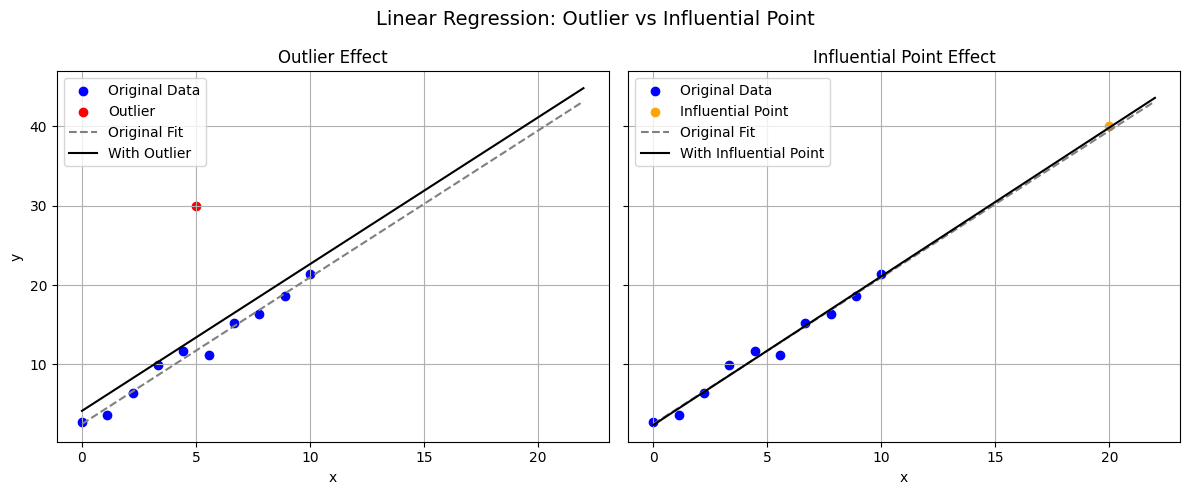

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Base data
np.random.seed(0)
x = np.linspace(0, 10, 10).reshape(-1, 1)
y = 2 * x.flatten() + 1 + np.random.normal(0, 1, size=x.shape[0])

# Fit original model (no outliers/influential points)
model_original = LinearRegression().fit(x, y)
x_range = np.linspace(0, 22, 100).reshape(-1, 1)
y_pred_original = model_original.predict(x_range)

# Outlier added (same x-range, abnormal y)
x_outlier = np.vstack([x, [[5]]])
y_outlier = np.append(y, [30])
model_outlier = LinearRegression().fit(x_outlier, y_outlier)
y_pred_outlier = model_outlier.predict(x_range)

# Influential point added (far x, large y)
x_influential = np.vstack([x, [[20]]])
y_influential = np.append(y, [40])
model_influential = LinearRegression().fit(x_influential, y_influential)
y_pred_influential = model_influential.predict(x_range)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot: Outlier case
axes[0].scatter(x, y, color='blue', label='Original Data')
axes[0].scatter(5, 30, color='red', label='Outlier')
axes[0].plot(x_range, y_pred_original, color='gray', linestyle='--', label='Original Fit')
axes[0].plot(x_range, y_pred_outlier, color='black', linestyle='-', label='With Outlier')
axes[0].set_title("Outlier Effect")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].legend()
axes[0].grid(True)

# Plot: Influential point case
axes[1].scatter(x, y, color='blue', label='Original Data')
axes[1].scatter(20, 40, color='orange', label='Influential Point')
axes[1].plot(x_range, y_pred_original, color='gray', linestyle='--', label='Original Fit')
axes[1].plot(x_range, y_pred_influential, color='black', linestyle='-', label='With Influential Point')
axes[1].set_title("Influential Point Effect")
axes[1].set_xlabel("x")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Linear Regression: Outlier vs Influential Point", fontsize=14)
plt.tight_layout()
plt.show()


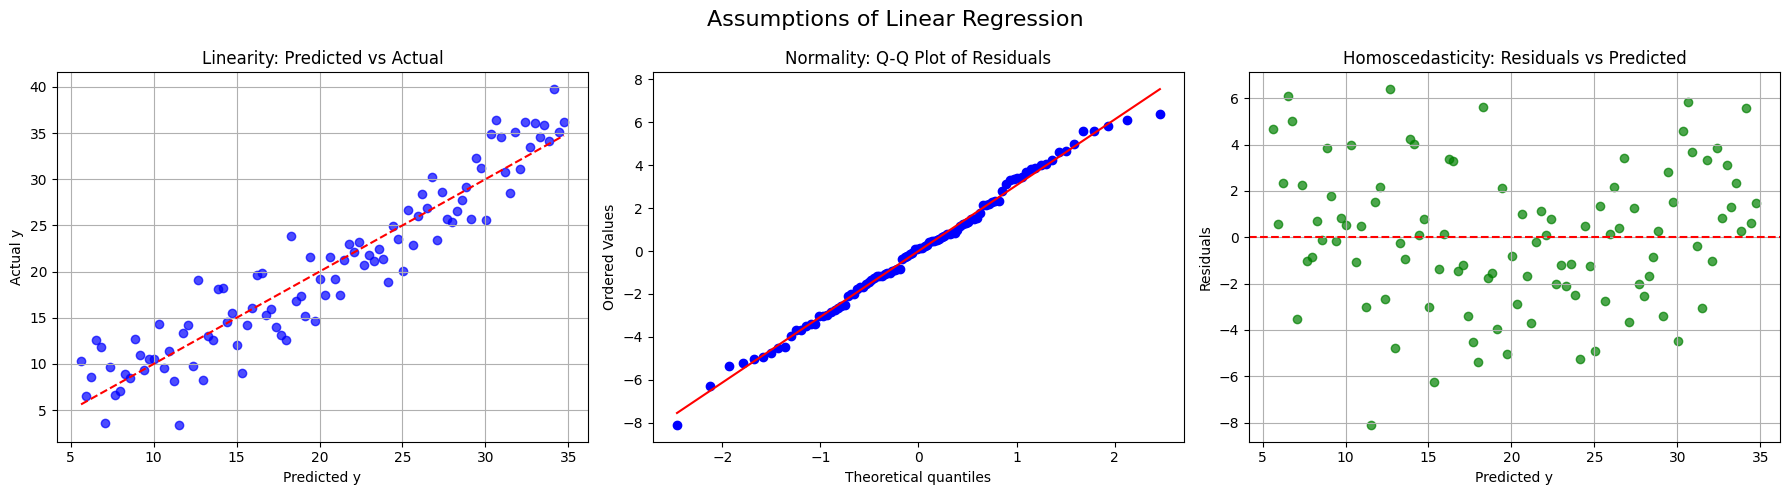

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

# 1. 샘플 데이터 생성 (선형 패턴 + 잡음)
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.flatten() + 5 + np.random.normal(0, 3, size=100)

# 2. 선형 회귀 모델 적합
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# 3. 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 선형성: 실제 y vs 예측 y
axes[0].scatter(y_pred, y, alpha=0.7, color='blue')
axes[0].plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r--')
axes[0].set_title("Linearity: Predicted vs Actual")
axes[0].set_xlabel("Predicted y")
axes[0].set_ylabel("Actual y")
axes[0].grid(True)

# 정규성: Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title("Normality: Q-Q Plot of Residuals")

# 등분산성: 예측값 vs 잔차
axes[2].scatter(y_pred, residuals, alpha=0.7, color='green')
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title("Homoscedasticity: Residuals vs Predicted")
axes[2].set_xlabel("Predicted y")
axes[2].set_ylabel("Residuals")
axes[2].grid(True)

plt.suptitle("Assumptions of Linear Regression", fontsize=16)
plt.tight_layout()
plt.show()


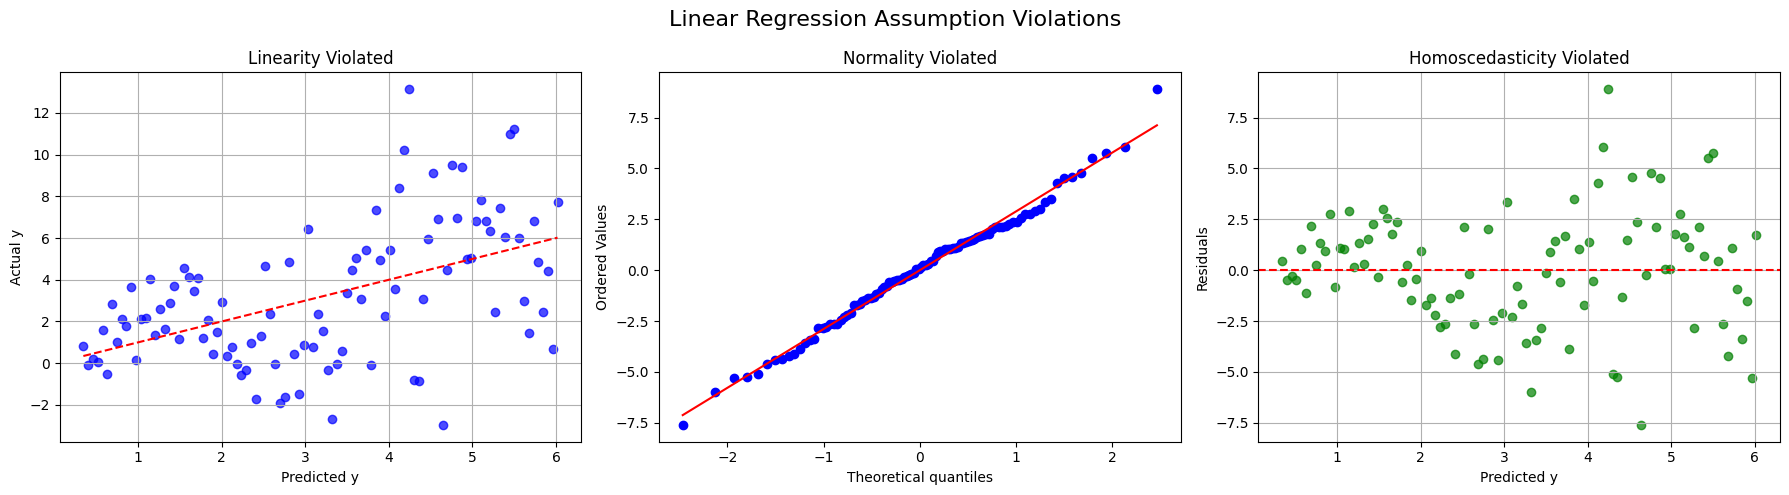

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

# 1. 위반된 데이터 생성
np.random.seed(1)
X = np.linspace(0, 10, 100).reshape(-1, 1)

# 비선형 관계 + 이분산성 + 비정규 잡음
y = 2 * np.sin(X).flatten() + 0.5 * X.flatten() + np.random.normal(0, 0.5 + 0.5 * X.flatten(), size=100)

# 2. 회귀 모델 적합
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# 3. 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 선형성 위반: Predicted vs Actual
axes[0].scatter(y_pred, y, alpha=0.7, color='blue')
axes[0].plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'r--')
axes[0].set_title("Linearity Violated")
axes[0].set_xlabel("Predicted y")
axes[0].set_ylabel("Actual y")
axes[0].grid(True)

# 잔차의 정규성 위반: Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title("Normality Violated")

# 등분산성 위반: Residuals vs Predicted
axes[2].scatter(y_pred, residuals, alpha=0.7, color='green')
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_title("Homoscedasticity Violated")
axes[2].set_xlabel("Predicted y")
axes[2].set_ylabel("Residuals")
axes[2].grid(True)

plt.suptitle("Linear Regression Assumption Violations", fontsize=16)
plt.tight_layout()
plt.show()


In [46]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# 데이터 생성
np.random.seed(42)
n = 150

# 독립 변수
area = np.random.normal(100, 20, n)        # 집 면적 (평방미터)
age = np.random.normal(10, 5, n)           # 집의 나이 (년)
lights = np.random.randint(5, 25, n)       # 조명의 수 (영향 없음)

# 종속 변수: 집값 (천만 원 단위)
price = 30 + 0.8 * area - 0.5 * age + np.random.normal(0, 5, n)

# 데이터프레임 생성
df = pd.DataFrame({
    'price': price,
    'area': area,
    'age': age,
    'lights': lights
})

# 선형 회귀 분석
model = smf.ols('price ~ area + age + lights', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     480.5
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.04e-75
Time:                        18:46:09   Log-Likelihood:                -449.98
No. Observations:                 150   AIC:                             908.0
Df Residuals:                     146   BIC:                             920.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.7155      2.545     12.856      0.000      27.686      37.745
area           0.7808      0.021     36.426      0.000       0.738       0.823
age           -0.7397      0.079     -9.339      0.000      -0.896      -0.583
lights         0.0979      0.073      1.343      0.181      -0.046       0.242
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.347
Skew:                          -0.117   Prob(JB):                        0.841
Kurtosis:                       2.965   Cond. No.                         644.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

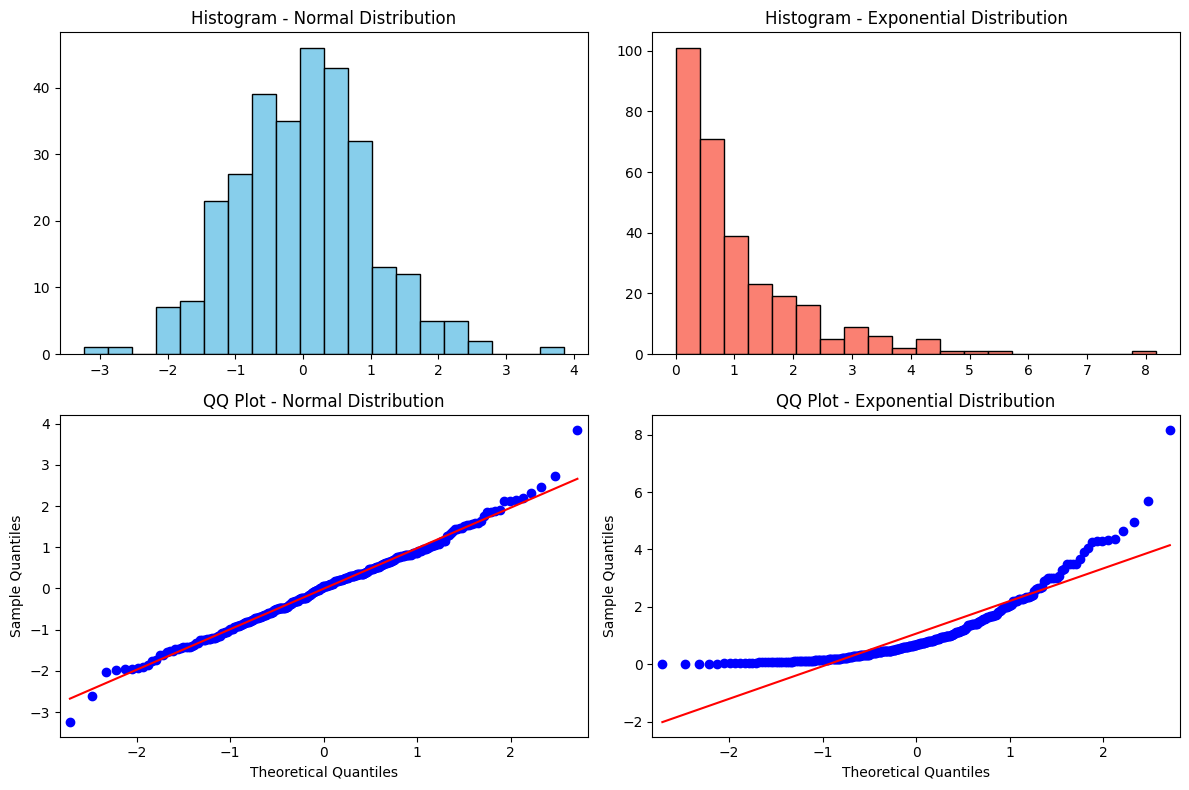

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 시드 고정
np.random.seed(42)

# 데이터 생성
data_norm = np.random.normal(loc=0, scale=1, size=300)
data_exp = np.random.exponential(scale=1, size=300)

# 2x2 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# [0,0] 정규분포 히스토그램
axes[0, 0].hist(data_norm, bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Histogram - Normal Distribution')

# [0,1] 지수분포 히스토그램
axes[0, 1].hist(data_exp, bins=20, color='salmon', edgecolor='black')
axes[0, 1].set_title('Histogram - Exponential Distribution')

# [1,0] 정규분포 QQ plot
sm.qqplot(data_norm, line='s', ax=axes[1, 0])
axes[1, 0].set_title('QQ Plot - Normal Distribution')

# [1,1] 지수분포 QQ plot
sm.qqplot(data_exp, line='s', ax=axes[1, 1])
axes[1, 1].set_title('QQ Plot - Exponential Distribution')

# 레이아웃 정리
plt.tight_layout()
plt.show()


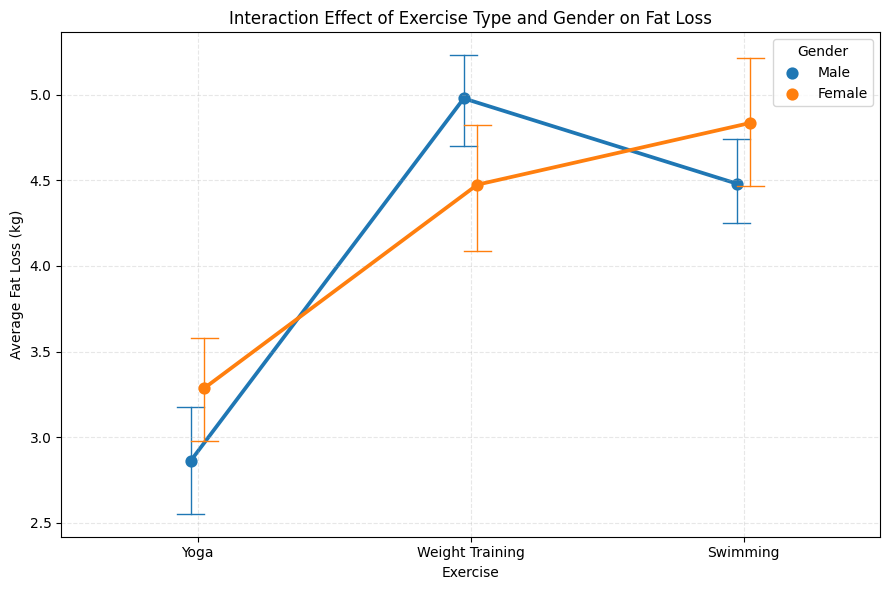

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(42)

# Define categories
exercise_types = ['Yoga', 'Weight Training', 'Swimming']
genders = ['Male', 'Female']
data = []

# Simulate data with interaction effect
for exercise in exercise_types:
    for gender in genders:
        if exercise == 'Weight Training':
            mean = 5.0 if gender == 'Male' else 4.5
        elif exercise == 'Yoga':
            mean = 3.0 if gender == 'Male' else 3.5
        else:  # Swimming
            mean = 4.5 if gender == 'Male' else 4.8
        fat_loss = np.random.normal(loc=mean, scale=0.8, size=20)
        
        for loss in fat_loss:
            data.append({'Exercise': exercise, 'Gender': gender, 'Fat Loss (kg)': loss})

# Create DataFrame
df = pd.DataFrame(data)

# Plot interaction line plot
plt.figure(figsize=(9, 6))
sns.pointplot(data=df, x='Exercise', y='Fat Loss (kg)', hue='Gender',
              dodge=True, markers='o', capsize=0.1, errwidth=1)
plt.title('Interaction Effect of Exercise Type and Gender on Fat Loss')
plt.ylabel('Average Fat Loss (kg)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
